** Introduction **

The MovieLens dataset analysis is an exploration of movie-related data, aiming to uncover valuable insights for movie enthusiasts, filmmakers, and movie platforms. This report provides a structured overview of the analysis and findings.

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Importing necessary libraries
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud

**Reading and Exploring the Data**

In [42]:
# Loading the 'movies.csv' dataset
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/movies.csv")

# Checking the shape of the dataset
data.shape

(27278, 3)

In [43]:
# Lets look at the first 5 rows of the dataframe
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [45]:
# Extracting number of unique movie IDs
movies = data['movieId'].unique().tolist()
len(movies)

27278

In [46]:
#check for missing values in the dataset
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [47]:
# Loading the 'ratings.csv' dataset
ratings_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/ratings.csv",sep=',')

# Checking the shape of the dataset
ratings_data.shape

(1048575, 4)

In [48]:

# Summary statistics of the ratings.csv
ratings_data.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [49]:
#check for missing values in the dataset
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [50]:
# Minimum and maximum ratings given to a movie
print("Minimum rating given to a movie:", ratings_data['rating'].min())
print("Maximum rating given to a movie:", ratings_data['rating'].max())

Minimum rating given to a movie: 0.5
Maximum rating given to a movie: 5.0


In [51]:
# Cleaning the data by removing the timestamp column
del ratings_data['timestamp']
print("After removing the timestamp column:")
print(ratings_data.head())

After removing the timestamp column:
   userId  movieId  rating
0       1        2     3.5
1       1       29     3.5
2       1       32     3.5
3       1       47     3.5
4       1       50     3.5


In [52]:
# Loading the 'tags.csv' dataset
tags_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/tags.csv',sep=',')

# Checking the shape of the dataset
tags_data.shape

(465564, 4)

In [53]:
# Checking for missing values in the dataset
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [61]:
# Drop rows with missing 'tag' values
tags_data.dropna(subset=['tag'], inplace=True)

In [62]:
# Checking for missing values in the dataset
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [63]:
# Number of unique tags
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)


38643

**Data Analysis**

In [66]:
# filtering to get the list of drama movies
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [67]:
# Total number of drama movies
drama_movies.shape

(27278,)

In [68]:
# Filtering to get the list of comedy movies
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [69]:
# Total no. of comedy movies
comedy_movies.shape

(27278,)

In [70]:
# Search movie id by tag search
tag_search = tags_data['tag'].str.contains('dark')
tags_data[tag_search].head()

,userId,movieId,tag,timestamp
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
4,65,592,dark hero,1368150078
21,65,6874,dark hero,1368150079
51,121,778,dark comedy,1300852846


In [72]:
# Display first 5 data from a dataframe
# here rating.csv has 4 columns
ratings_data.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [73]:
# Displays first 5 data from a dataframe
# Here movies.csv has 3 columns
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [82]:
# Merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data=data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0


In [83]:
# Displays high rated movies
high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0


In [84]:
# Displays low rated movies
low_rated = movie_data_ratings_data['rating']<4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0


In [85]:
# Total number of unique movie genre
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

1342

In [86]:
# Top 25 most rated movies
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(10)

title
Pulp Fiction (1994)                          3498
Forrest Gump (1994)                          3476
Silence of the Lambs, The (1991)             3247
Shawshank Redemption, The (1994)             3216
Jurassic Park (1993)                         3129
Star Wars: Episode IV - A New Hope (1977)    2874
Braveheart (1995)                            2799
Terminator 2: Judgment Day (1991)            2711
Matrix, The (1999)                           2705
Schindler's List (1993)                      2598
dtype: int64

In [87]:
# Slicing out columns to display only title and genres columns from movies.csv
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [88]:
# Here we extract year from title
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [89]:
# Define a function that counts the number of times each genre appear:
def count_genre_occurences(dataframe, column_name, genre_list):
  #create an empty dictionary to store genre counts
    genre_count = {}

    #initialise counts for each genre to zero
    for genre in genre_list:
      genre_count[genre] = 0
    for list_keywords in dataframe[column_name].str.split('|'):
        if type(list_keywords) == float and pd.isnull(list_keywords):
          continue
        for genre in list_keywords:
            if pd.notnull(genre):
              genre_count[genre] += 1

    # convert the dictionary in a list to sort the keywords  by frequency
    genre_occurences = []
    for genre,count in genre_count.items():
        genre_occurences.append([genre,count])
    genre_occurences.sort(key = lambda x:x[1], reverse = True)
    return genre_occurences, genre_count

In [90]:
# Create a set to count the unique genres
genre_labels = set()
for genre in data['genres'].str.split('|').values:
  genre_set = set(genre)
  genre_labels = genre_labels.union(genre_set)

In [91]:
# Counting how many times each of genres occur:
keyword_occurences, dum = count_genre_occurences(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

**Data Visualization**

In [92]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(180.0 * 255.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

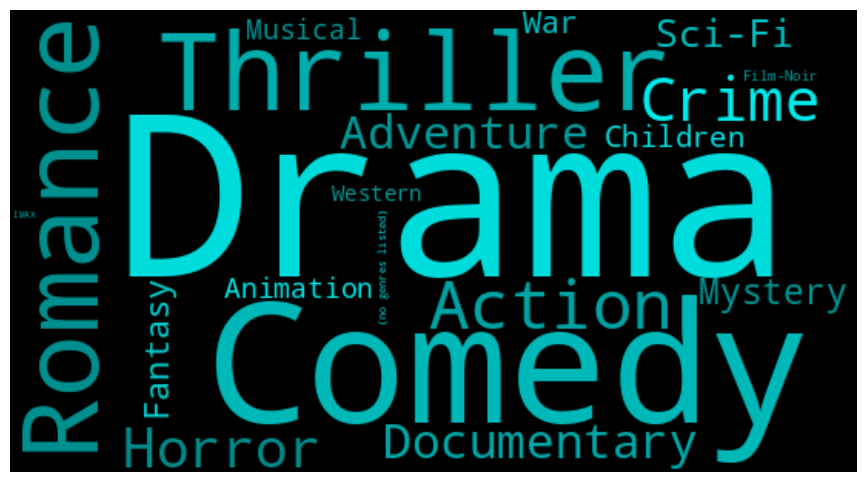

In [93]:
# Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,
                      height=300,
                      background_color='black',
                      max_words=1628,
                      relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

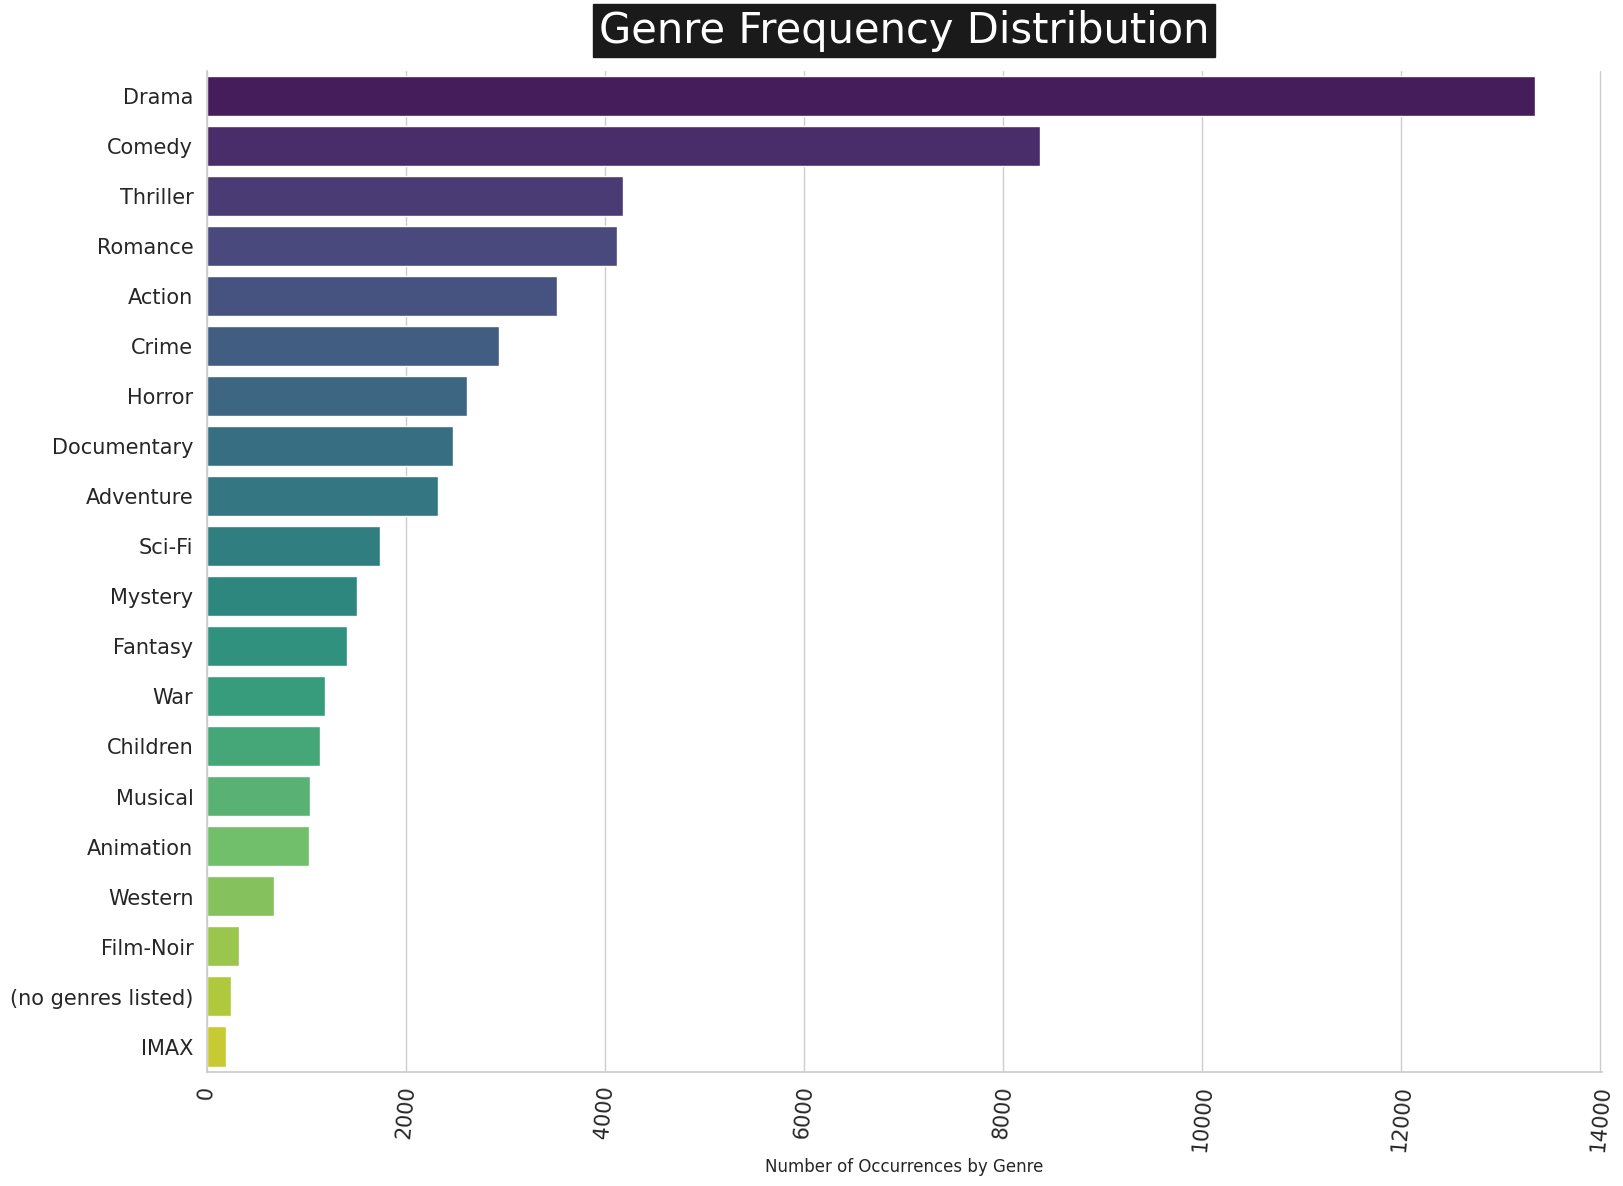

In [94]:
# Create a DataFrame from trunc_occurrences
df = pd.DataFrame(trunc_occurences, columns=['Genre', 'Frequency'])

# Set the style for Seaborn
sns.set(style='whitegrid')

# Create histogram using Seaborn
plt.figure(figsize=(18, 13))
ax = sns.barplot(x='Frequency', y='Genre', data=df, palette='viridis')
ax.set(xlabel="Number of Occurrences by Genre", ylabel="")
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)

# Customize the title for a better look
title = "Genre Frequency Distribution"
plt.title(title, fontsize=30, color='w', backgroundcolor='k', pad=20)

# Remove the top and right spines of the plot
sns.despine()

plt.show()

In conclusion, as I wrap up this analysis of the MovieLens dataset, I find it fascinating to highlight the top 10 most rated movies, which includes timeless classics such as "Pulp Fiction," "Forrest Gump," and "The Silence of the Lambs." These films have garnered a substantial number of ratings, showcasing their enduring popularity among viewers, including myself.

Moreover, our exploration revealed that the top three genres in the dataset are drama, comedy, and thriller. These genres dominate the movie landscape and resonate with a wide audience. Drama often immerses us in compelling narratives, while comedy provides much-needed laughter, and thrillers keep us on the edge of our seats.

As a movie enthusiast and data science graduate student, this analysis has not only provided valuable insights into the world of cinema but has also sparked my curiosity about the intricate dynamics of audience preferences and movie trends. These findings not only guide us in selecting films to watch but also offer a deeper understanding of the ever-evolving movie industry.

In closing, this analysis serves as a stepping stone for future investigations within the realm of movie analytics. Exploring genre-specific trends, or movie recommendation models could be exciting avenues to explore based on the insights gained from this analysis.